In [1]:
# Import the necessary libraries
import pandas as pd
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import keras


In [2]:
# Read the file 'backprop.csv'
df = pd.read_csv('backprop.csv')


In [3]:
# Take a quick look at your dataset
df.head()


,x,y
0,-5.00000,0.006693
1,-4.98999,0.006760
2,-4.97998,0.006827
3,-4.96997,0.006895
4,-4.95996,0.006964


In [8]:
# Assign the predictor and response data values to x and y variable
x = df['x'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)
# x = df['x'].values
# y = df['y'].values


In [7]:
x.shape,y.shape

((1000,), (1000,))

In [9]:
# After reshape
x.shape,y.shape

((1000, 1), (1000, 1))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation=tf.math.sin, input_dim=1),
    tf.keras.layers.Dense(1,activation = tf.math.sin)
])

# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.python.ops.gen_math_ops import sin
# Define the neural network model given by the figure in the instructions
# Create a tensorflow.keras model with 1 hidden layer consisting of 3 neurons.
model = keras.Sequential()
# inputs = keras.Input(shape=(1,))
# dense1 = keras.layers.Dense(3,activation='sin')(inputs)
# output = keras.layers.Dense(1,activation='sin')(dense1)
model.add(keras.layers.Dense(3,input_shape=(1,),activation=tf.math.sin))
model.add(keras.layers.Dense(1,activation = tf.math.sin))
# Take a look at the model summary
# model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


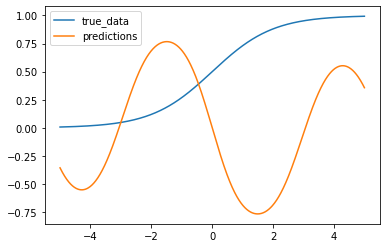

In [6]:
# Plot the true data and the predictions of your neural network
predictions = np.asarray(model.predict(x))
plt.plot(x,y,label='true_data')
plt.plot(x,predictions,label='predictions')
plt.legend()


In [6]:
epochs = 6000
lr = 0.1
loss_fn = tf.keras.losses.MeanSquaredError()
losses = []
for i in range(epochs):
  with tf.GradientTape(persistent=True) as tape:
    # Forward pass
    output = model(x)
    # calculate losses
    loss = loss_fn(y,output)
  # Append Loss
  losses.append(loss)
  # Calculate gradient
  gradient = tape.gradient(loss,model.trainable_variables)
  # Back propagation
  model_weights = model.get_weights()
  model.set_weights(model_weights - lr*np.array(gradient))
  if i%100==0:
        print(f'Loss is {loss} at epoch {i}')

  if loss <= 0.001:
        break


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Loss is 0.8954868316650391 at epoch 0
Loss is 0.15143060684204102 at epoch 100
Loss is 0.15143060684204102 at epoch 200
Loss is 0.15143060684204102 at epoch 300
Loss is 0.15143060684204102 at epoch 400
Loss is 0.15143060684204102 at epoch 500
Loss is 0.15143060684204102 at epoch 600
Loss is 0.15143060684204102 at epoch 700
Loss is 0.15143060684204102 at epoch 800
Loss is 0.15143060684204102 at epoch 900
Loss is 0.15143060684204102 at epoch 1000
Loss is 0.15143060684204102 at epoch 1100
Loss is 0.15143060684204102 at epoch 1200
Loss is 0.15143060684204102 at epoch 1300
Loss is 0.15143060684204102 at epoch 1400
Loss is 0.15143060684204102 at epoch 1500
Loss is 0.15143060684204102 at epoch 1600
Loss is 0.15143060684204102 at epoch 1700
Loss is 0.15143060684204102 at epoch 1800
Loss is 0.15143060684204102 at epoch 1900
Loss is 0.15143060684204102 at epoch 2000
Loss is 0.15143060684204102 at epoch 2100
Loss is 0.15143060684204102 at epoch 2200
Loss is 0.15143060684204102 at epoch 2300
Loss 

In [6]:
## Using Backpropagation to find the gradients and update
## Remember to use gradient tape 

# Your code here 

# Define the loss function
loss_fn = tf.keras.losses.MeanSquaredError()

# Instantiate an optimizer
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Initialize a list to store the losses
losses = []

# Define number of epochs
num_epochs = 4000

# Run a loop for the number of epochs
for i in range(num_epochs):

    # Open a GradientTape
    with tf.GradientTape() as tape:

        # Forward pass.
        output = model(x)

        # Loss value for this batch.
        loss =  loss_fn(y, output)

    # Get gradients of weights wrt the loss.
    gradients = tape.gradient(loss, model.trainable_variables)

    # Update the weights of our linear layer.
    # Use optimizer.apply_gradients() function
    _ = optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Append the loss to the losses list
    losses.append(loss)
    
    # For every 100th epoch print the loss
    if i%100==0:
        print(f'Loss is {loss} at epoch {i}')

    if loss <= 0.001:
        break


Loss is 0.6466825008392334 at epoch 0


In [ ]:
losses

In [18]:
# Plot the neural network predictions, 
# and the loss landscape

# Your code here
